In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d


In [212]:
raw_data = pd.read_csv('3.csv')
raw_data = pd.DataFrame(raw_data).to_numpy()
raw_time = raw_data[:,0] + 10
raw_v = (raw_data[:,1] + 0.04) / 2


In [213]:
v_interp = interp1d(raw_time, raw_v, kind="linear")

start_time = 1.38
stop_time = raw_time[-1]
step_size = 0.00005
time = np.arange(start_time, stop_time, step_size)

v = v_interp(time)


Our integral is found from 
$$ V_{out} = \int_{0}^{t} \frac{-V_{in}}{RC} \,dt + c $$
where c is out output voltage at t=0  which has already been adjusted for. 
We produced $V_{in}$ with out arbitrary function generator producing a signal modeled by $\frac{sinx}{x}$, with an maximum amplitude of 3.287 V (i.e. a peak voltage of 4 V), and a "frequency" of .64. While we are trying to integrate the sinc function from zero to infinity, this is obviously impossible so we decided that 32 cycles would get us a close-enough estimation. Thus we gave the signal generator a sinc fucntion defined on the range t=0 to the 32nd "cycle," and set the frequency of the signal generator to 20 mHz. This tells us that we will have 32 cycles in 50 seconds, or periodicity of .64 Hz, and a "wavelength" of $2\pi(.64) = 4.02$. 
Note that due to an unfortunate data collection mistake, the input signal recorded by the oscilloscope was not saved. Please see the attatched image to see exactly what the oscillosope saw in one of our trials. (Figure showing integration). In the below plot, the input function (i.e. $V_{in}$ is given wrt time by the function $3.287\frac{\sin(4.02t)}{4.02t}$. Our integrator had an RC time constant of 1.05 and thus the integral that our circuit should be computing is:
$$ \frac{3.287}{1.05} \int_{0}^{50} \frac{\sin(4.02t)}{4.02t} \,dt $$
This is not done. Need to do acceptance test and make verything look nice. 
Also I want to do a fourier transform, convolute it with our filtering function, and then see if we still agree are even agree better.

In [214]:
def sinc(x):
    return np.sin(x) / x


/var/folders/47/0pv_3t814gx1fytsv44kdscw0000gn/T/ipykernel_19598/2363874353.py:2: RuntimeWarning: invalid value encountered in true_divide
  return np.sin(x) / x


<function matplotlib.pyplot.show(close=None, block=None)>

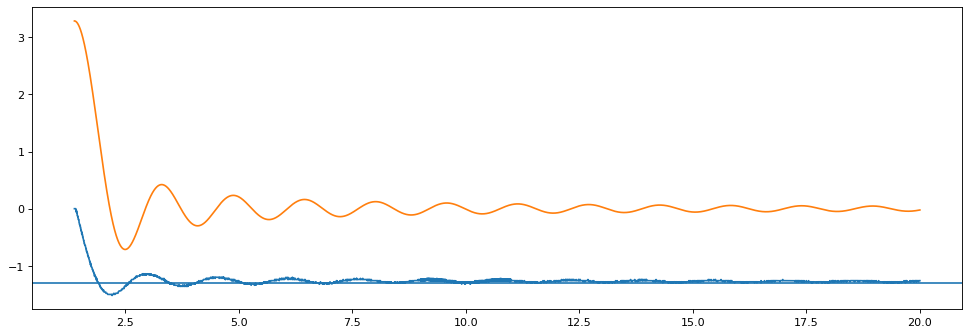

In [216]:
plt.figure(figsize=(15, 5), dpi=80)
plt.plot(time, v)
plt.plot(time, 3.287*sinc(4.02*(time-1.38)))
plt.axhline(y = (-2.64+.04) / 2)

plt.show

In [217]:
(-2.64+.04) / 2

-1.3